Carregando os dados

In [11]:
import pandas as pd

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
#lendo as 5 primeiras linhas do dataset
df_raw.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Através desse método info, conseguimos checar algumas informações importantes referente ao dataset:
1. podemos ver que não há nenhhum dado faltante, pois temos 21613 entradas, e estas são iguais em cada uma das features (colunas)
2. conseguimos ver que o campo que se refere a data é do tipo objeto, provavelmente seja necessário convertê-lo se for trabalhar com series temporais.
3. os campos preço, banheiros e banheiras estão com o formato do tipo float, isso também talvez atrapalhe na criação de modelos de regressão linear futuramente.

In [15]:
df_raw.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


A função a acima, padroniza que os campos do tipo float tenham 3 casas após a virgula.

Entendendo os números

Através desse método describe, conseguimos acessar as estatíticas desse conjunto de dados. 
1. A média de preço entre as casas é 540.088 sendo que a casa mais cara é a de 7.7000.000
2. A média de banheiros por casa é de 3 e há no máximo 33 banheiros e alguma casa
3. A média de banheiras por casa é de 2 e tem no máximo 8 banheiras e alguma casa
4. A média de área util é de 2.079 por casa e o máximo de área util é de 13.540

In [34]:
# quantidade de banheiros por casa.  
df_raw['bedrooms'].value_counts()

3.000     9824
4.000     6882
2.000     2760
5.000     1601
6.000      272
1.000      199
7.000       38
8.000       13
9.000        6
10.000       3
33.000       1
11.000       1
Name: bedrooms, dtype: int64

In [22]:
df_raw['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Conseguimos notar que 19489 casas ainda não foram visualizadas(visitadas) e 319 casas já foram vistas por 4 vezes.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

C:\Users\Micro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

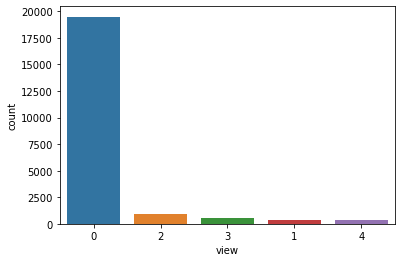

In [28]:

sns.countplot(df_raw.view, order = df_raw['view'].value_counts().index)


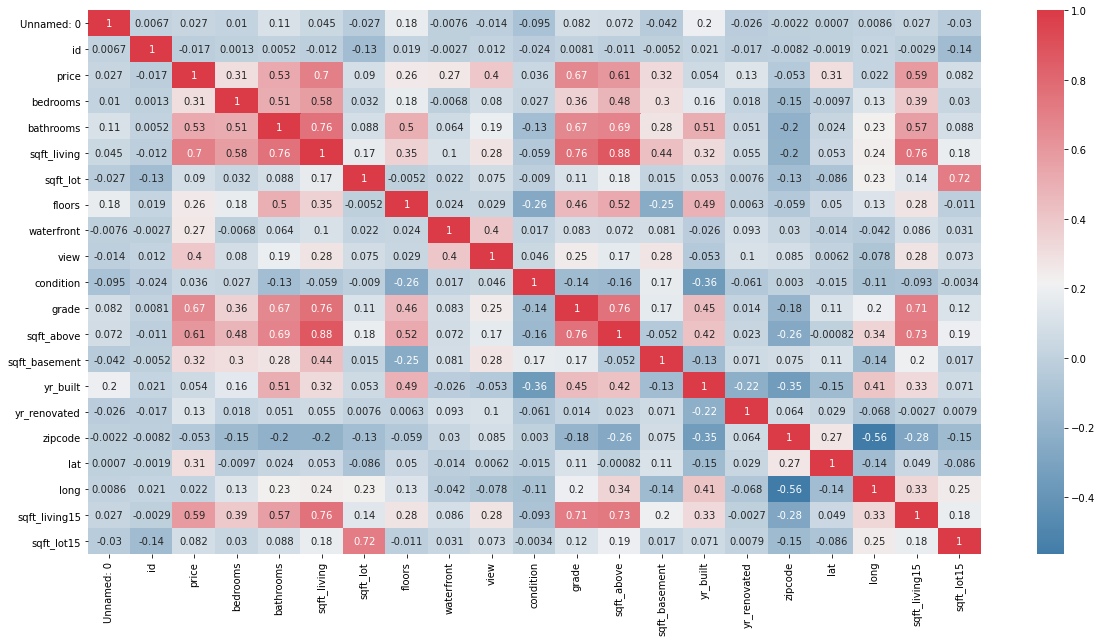

In [33]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (20, 10))
    colormap= sns.diverging_palette(240, 10, as_cmap = True)
    sns.heatmap(df_raw.corr(), annot=True, cmap = colormap)

correlation_heatmap(df_raw)

Através da matriz de correlação, é possível identificar que há uma correlação positiva entre o preço e a área útil.